<a href="https://colab.research.google.com/github/s20488/PJN/blob/main/Anastasiia_Ponkratova_%5BTemplate%5D_huggingface_transformers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

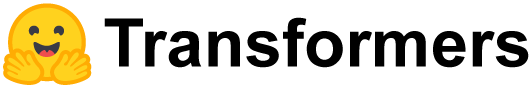

In [ ]:
!pip install transformers

# Przegląd dos†ępnych zadań (pipelines)

In [ ]:
from transformers import pipeline

## Klasyfikacja tekstu

model: https://huggingface.co/ProsusAI/finbert?text=Stocks+rallied+and+the+British+pound+gained.

In [ ]:
stock_sentiment = pipeline("text-classification", model = "ProsusAI/finbert")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/758 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [ ]:
stock_sentiment("Stocks rallied and the British pound gained.")

[{'label': 'positive', 'score': 0.8983616232872009}]

## Rozpoznawanie jednostek nazewniczych (Named Entity Recognition (NER))

model : https://huggingface.co/dslim/bert-base-NER-uncased

In [ ]:
ner = pipeline("ner", model = "dslim/bert-base-NER-uncased")

config.json:   0%|          | 0.00/1.26k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

Some weights of the model checkpoint at dslim/bert-base-NER-uncased were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [ ]:
ner("My name is Wolfgang and I live in Berlin")

[{'entity': 'B-PER',
  'score': 0.993952,
  'index': 4,
  'word': 'wolfgang',
  'start': 11,
  'end': 19},
 {'entity': 'B-LOC',
  'score': 0.997895,
  'index': 9,
  'word': 'berlin',
  'start': 34,
  'end': 40}]

## Question answering

model = https://huggingface.co/deepset/roberta-base-squad2

In [ ]:
qa = pipeline("question-answering", model = "deepset/roberta-base-squad2")

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/496M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/79.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [ ]:
context = "My name is Sarah and I live in London"

In [ ]:
qa(question = "What is my name?", context = context)

{'score': 0.5483850240707397, 'start': 11, 'end': 16, 'answer': 'Sarah'}

In [ ]:
qa(question = "Where do I live?", context = context)

{'score': 0.7772305607795715, 'start': 31, 'end': 37, 'answer': 'London'}

## Sumaryzacja

model : https://huggingface.co/facebook/bart-large-cnn

In [ ]:
summarization = pipeline("summarization", model = "facebook/bart-large-cnn")

config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [ ]:
long_text = "The tower is 324 metres (1,063 ft) tall, about the same height as an 81-storey building, and the tallest structure in Paris. Its base is square, measuring 125 metres (410 ft) on each side. During its construction, the Eiffel Tower surpassed the Washington Monument to become the tallest man-made structure in the world, a title it held for 41 years until the Chrysler Building in New York City was finished in 1930. It was the first structure to reach a height of 300 metres. Due to the addition of a broadcasting aerial at the top of the tower in 1957, it is now taller than the Chrysler Building by 5.2 metres (17 ft). Excluding transmitters, the Eiffel Tower is the second tallest free-standing structure in France after the Millau Viaduct."

In [ ]:
summarization(long_text)

[{'summary_text': 'The tower is 324 metres (1,063 ft) tall, about the same height as an 81-storey building. Its base is square, measuring 125 metres (410 ft) on each side. During its construction, the Eiffel Tower surpassed the Washington Monument to become the tallest man-made structure in the world.'}]

## Generowanie tekstu

In [ ]:
generator = pipeline("text-generation", model = "gpt2")

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


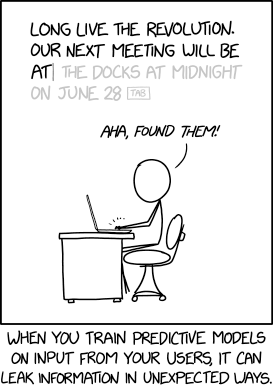

In [ ]:
generator("Long live the rovolution our next meeting will be at")

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


[{'generated_text': "Long live the rovolution our next meeting will be at 8 p.m.\n\nWe've got everything you need to build your own RV park, RV bar, RV shop, RV camping facilities, RV rental equipment, camping supplies, RV"}]

## Klasyfikacja obrazu

In [ ]:
image_classifier = pipeline("image-classification")

No model was supplied, defaulted to google/vit-base-patch16-224 and revision 3f49326 (https://huggingface.co/google/vit-base-patch16-224).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [ ]:
!wget https://i.natgeofe.com/n/548467d8-c5f1-4551-9f58-6817a8d2c45e/NationalGeographic_2572187.jpg?w=718&h=479

--2024-11-15 02:06:38--  https://i.natgeofe.com/n/548467d8-c5f1-4551-9f58-6817a8d2c45e/NationalGeographic_2572187.jpg?w=718
Resolving i.natgeofe.com (i.natgeofe.com)... 23.54.155.137, 23.54.155.135, 2600:1417:3f::b81b:7a31, ...
Connecting to i.natgeofe.com (i.natgeofe.com)|23.54.155.137|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50915 (50K) [image/jpeg]
Saving to: ‘NationalGeographic_2572187.jpg?w=718’

NationalGeographic_ 100%[===================>]  49.72K   140KB/s    in 0.4s    

2024-11-15 02:06:40 (140 KB/s) - ‘NationalGeographic_2572187.jpg?w=718’ saved [50915/50915]



In [ ]:
image_classifier("NationalGeographic_2572187.jpg?w=718")

[{'label': 'Egyptian cat', 'score': 0.8055211901664734},
 {'label': 'tiger cat', 'score': 0.09536274522542953},
 {'label': 'tabby, tabby cat', 'score': 0.06876475363969803},
 {'label': 'lynx, catamount', 'score': 0.007865543477237225},
 {'label': 'Siamese cat, Siamese', 'score': 0.0032071955502033234}]

# Zadania - Tworzenie własnych modeli

## Zadanie 1 - Zbiór danych

https://huggingface.co/docs/datasets

### Tokenizacja

1.1 Pobierz tokenizer "distilbert-base-uncased"

In [ ]:
from transformers import AutoTokenizer

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased") # TODO

In [ ]:
text = "siała baba mak"

In [ ]:
encoded_text = tokenizer(text)

In [ ]:
encoded_text

{'input_ids': [101, 9033, 2050, 22972, 14208, 5003, 2243, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1]}

In [ ]:
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)

In [ ]:
tokens

['[CLS]', 'si', '##a', '##ła', 'baba', 'ma', '##k', '[SEP]']

### Zbiór danych

In [ ]:
!pip install datasets

1.2 Wczytaj dataset do emocji z biblioteki datasets.
https://huggingface.co/datasets/emotion

In [ ]:
from datasets import load_dataset # TODO

In [ ]:
emotions_dataset = load_dataset("emotion") # TODO

In [ ]:
emotions_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [ ]:
emotions_dataset['train']['text'][:5]

['i didnt feel humiliated',
 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
 'im grabbing a minute to post i feel greedy wrong',
 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
 'i am feeling grouchy']

In [ ]:
emotions_dataset['train']['label'][:5]

[0, 0, 3, 2, 3]

### Tokenizacja zbioru danych

1.3 Wczytaj automatczny tokenizer distilbert-base-uncased.

In [ ]:
from transformers import AutoTokenizer # TODO

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased") # TODO

Tworzymy fukncje tokenizująca jedną paczkę danych

**padding** - uzupełnianie tekstu do konkretnej długości

**truncation** - przycinanie tekstu do konkretnej długości


In [ ]:
def tokenize(batch):
  return tokenizer(batch["text"], padding=True, truncation=True)

In [ ]:
print(tokenize(emotions_dataset["train"][:2]))

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


Attention mask - pokazuje modelowi gdzie kończy się tekst

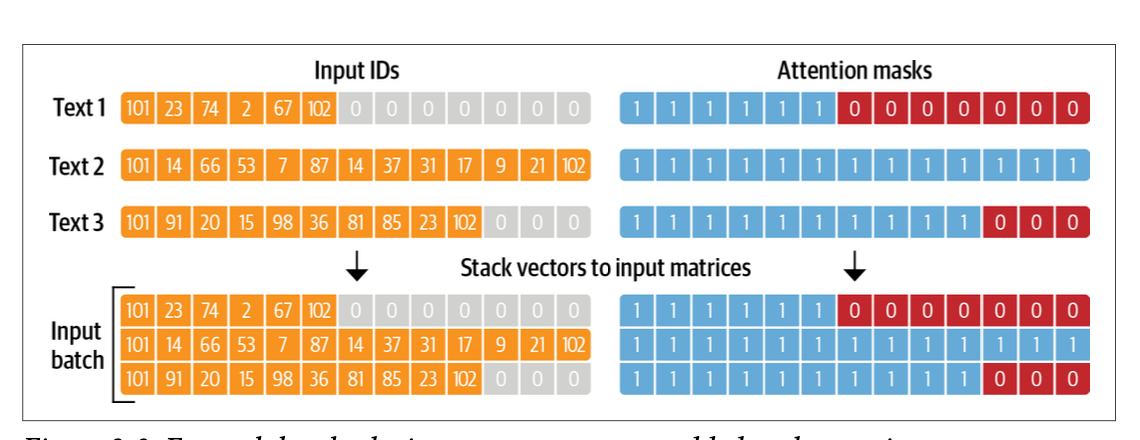

1.4 *Tokenizujemy* cały dataset używając funkcji map

In [ ]:
emotions_encoded = {
    'train': emotions_dataset['train'].map(tokenize, batched=True, batch_size=None),
    'validation': emotions_dataset['validation'].map(tokenize, batched=True, batch_size=None),
    'test': emotions_dataset['test'].map(tokenize, batched=True, batch_size=None)
} # TODO

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

**batch_size = None** - przetwarza cały dataset na raz, co zapewnia że wszystkie teksty mają taką samą długość

## Zadanie 2 - trening modelu klasyfikacji tekstu

In [ ]:
from transformers import AutoModelForSequenceClassification
import torch

2.1 Wczytaj model do klasyfikacji sekwencji z 6 etykietami "distilbert-base-uncased" wykorzystując klase AutoModel https://huggingface.co/transformers/v3.0.2/model_doc/auto.html#

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=6).to(torch.device("cuda")) # TODO .to(torch.device("cuda"))

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


#### Metryki

2.2 Policz metryki. Policz F1-score weighted i accuracy.

In [ ]:
from sklearn.metrics import accuracy_score, f1_score
def compute_metrics(pred):
  true = pred.label_ids
  preds = pred.predictions.argmax(-1)
  f1 = f1_score(true, preds, average='weighted') # TODO
  acc = accuracy_score(true, preds) # TODO
  return {"accuracy": acc, "f1": f1}

### Parametry treningu

In [ ]:
from transformers import TrainingArguments

In [ ]:
batch_size = 64
logging_steps = len(emotions_dataset["train"]) // batch_size
training_args = TrainingArguments(
    output_dir = "classification_model",
    num_train_epochs=2,
    learning_rate=2e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    weight_decay=0.01,
    eval_strategy="epoch",
    disable_tqdm=False,
    logging_steps=logging_steps,
    log_level="error",
    report_to="none")

### Trening

2.3 Wytrenuj model z wykorzystaniem klasy Trainer https://huggingface.co/transformers/v3.0.2/main_classes/trainer.html?highlight=trainer, pamiętaj o podaniu odpowiednich parametrów.

In [ ]:
from transformers import Trainer # TODO

In [ ]:
print(emotions_encoded)

{'train': Dataset({
    features: ['text', 'label', 'input_ids', 'attention_mask'],
    num_rows: 16000
}), 'validation': Dataset({
    features: ['text', 'label', 'input_ids', 'attention_mask'],
    num_rows: 2000
}), 'test': Dataset({
    features: ['text', 'label', 'input_ids', 'attention_mask'],
    num_rows: 2000
})}


In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=emotions_encoded["train"],
    eval_dataset=emotions_encoded["validation"],
    compute_metrics=compute_metrics
) # TODO

In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.850700,0.326438,0.905000,0.904420
2,0.258800,0.222071,0.924500,0.924612


TrainOutput(global_step=500, training_loss=0.5547587585449218, metrics={'train_runtime': 248.5919, 'train_samples_per_second': 128.725, 'train_steps_per_second': 2.011, 'total_flos': 720342861696000.0, 'train_loss': 0.5547587585449218, 'epoch': 2.0})

### Testy

In [ ]:
preds_output = trainer.predict(emotions_encoded["validation"])

In [ ]:
preds_output.metrics

{'test_loss': 0.22207073867321014,
 'test_model_preparation_time': 0.0141,
 'test_accuracy': 0.9245,
 'test_f1': 0.9246117051402694,
 'test_runtime': 5.0444,
 'test_samples_per_second': 396.48,
 'test_steps_per_second': 6.344}

In [ ]:
import numpy as np

In [ ]:
y_preds = np.argmax(preds_output.predictions, axis=1)
y_valid = np.array(emotions_dataset["validation"]["label"])

labels = emotions_dataset["train"].features["label"].names

In [ ]:
labels

['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_preds, y_true, labels):
  cm = confusion_matrix(y_true, y_preds, normalize="true")
  fig, ax = plt.subplots(figsize=(6, 6))
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
  disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
  plt.title("Normalized confusion matrix")
  plt.show()

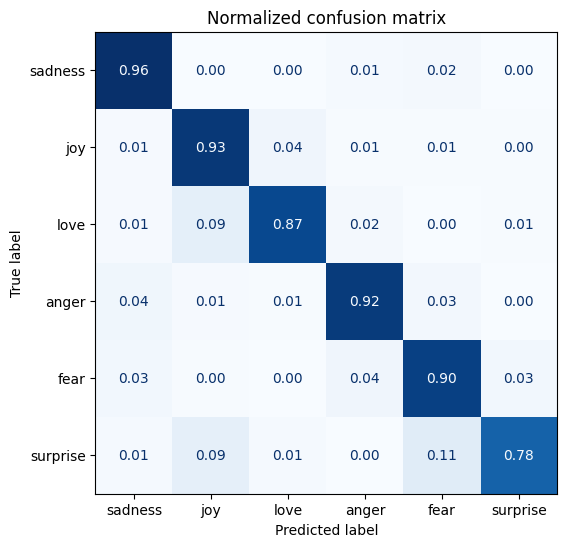

In [ ]:
plot_confusion_matrix(y_preds, y_valid, labels)

In [ ]:
from transformers import TextClassificationPipeline

In [ ]:
emotions_pipeline = TextClassificationPipeline(model = model.cpu(), tokenizer = tokenizer)

In [ ]:
emotions_pipeline("I am so angry")

[{'label': 'LABEL_3', 'score': 0.9590109586715698}]

## Zadanie 3 - trening modelu klasyfikacji słów

#### NER

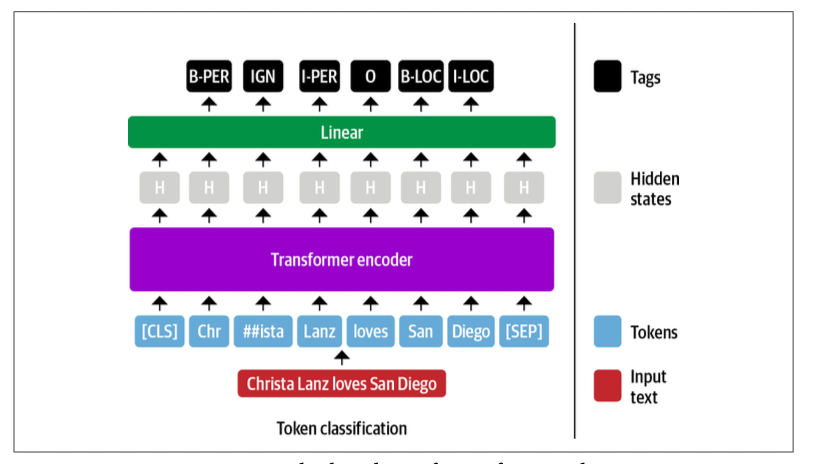

In [ ]:
from datasets import load_dataset

In [ ]:
ner_dataset = load_dataset("xtreme", name="PAN-X.en")

README.md:   0%|          | 0.00/131k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/942k [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/472k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/472k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/20000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

In [ ]:
ner_dataset

DatasetDict({
    train: Dataset({
        features: ['tokens', 'ner_tags', 'langs'],
        num_rows: 20000
    })
    validation: Dataset({
        features: ['tokens', 'ner_tags', 'langs'],
        num_rows: 10000
    })
    test: Dataset({
        features: ['tokens', 'ner_tags', 'langs'],
        num_rows: 10000
    })
})

In [ ]:
tags = ner_dataset["train"].features["ner_tags"].feature

In [ ]:
tags

ClassLabel(names=['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC'], id=None)

In [ ]:
index2tag = {idx: tag for idx, tag in enumerate(tags.names)}
tag2index = {tag: idx for idx, tag in enumerate(tags.names)}

In [ ]:
index2tag

{0: 'O',
 1: 'B-PER',
 2: 'I-PER',
 3: 'B-ORG',
 4: 'I-ORG',
 5: 'B-LOC',
 6: 'I-LOC'}

In [ ]:
ner_dataset['train']['tokens'][2]

['Karl', 'Ove', 'Knausgård', '(', 'born', '1968', ')']

In [ ]:
ner_dataset['train']['ner_tags'][2]

[1, 2, 2, 0, 0, 0, 0]

In [ ]:
[index2tag[t] for t in ner_dataset['train']['ner_tags'][2]]

['B-PER', 'I-PER', 'I-PER', 'O', 'O', 'O', 'O']

### Tokenizacja

3.1 Ztokenizuj dane tokenizatorem xlm-roberta-base.

In [ ]:
from datasets import load_dataset # TODO

In [ ]:
ner_dataset = load_dataset("xtreme", name="PAN-X.en") # TODO

In [ ]:
encoded_text = tokenizer(ner_dataset['train']['tokens'][2], is_split_into_words=True)

In [ ]:
encoded_text

{'input_ids': [0, 17038, 91292, 341, 76, 223, 33653, 15, 103122, 28015, 1388, 2], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [ ]:
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)

In [ ]:
tokens

['<s>',
 '▁Karl',
 '▁Ove',
 '▁K',
 'na',
 'us',
 'gård',
 '▁(',
 '▁born',
 '▁1968',
 '▁)',
 '</s>']

In [ ]:
encoded_text.word_ids(batch_index = 0)

[None, 0, 1, 2, 2, 2, 2, 3, 4, 5, 6, None]

**word_ids** - informuje nas o tym które tokeny należą do tego samego słowa

Checmy oznaczyć encją tylko pierwszy token każdego słowa

In [ ]:

def tokenize_and_align_labels(examples):
  tokenized_inputs = tokenizer(examples["tokens"], truncation=True, is_split_into_words=True)
  labels = []
  for idx, label in enumerate(examples["ner_tags"]): #iteracja po każdym zdaniu
    word_ids = tokenized_inputs.word_ids(batch_index=idx)  #word_ids - informuje nas o tym które tokeny należą do tego samego słowa
    previous_word_idx = None
    label_ids = []
    for word_idx in word_ids: #iteracja po każdym słowie

      if word_idx is None or word_idx == previous_word_idx: #jeśli token należy do tego samego słowa co poprzedni
        label_ids.append(-100) # do etykiet dodajemy -100 (-100 w większości fukcji błedu jest ignorowane)
      else:
        label_ids.append(label[word_idx]) #jeśli token jest pierwszym tokenem nowego słowa dodajemy jego label
      previous_word_idx = word_idx
    labels.append(label_ids)

  tokenized_inputs["labels"] = labels
  return tokenized_inputs


In [ ]:
ner_dataset = ner_dataset.map(tokenize_and_align_labels, batched=True,
remove_columns=['langs', 'ner_tags', 'tokens'])

Map:   0%|          | 0/20000 [00:00<?, ? examples/s]

Map:   0%|          | 0/10000 [00:00<?, ? examples/s]

Map:   0%|          | 0/10000 [00:00<?, ? examples/s]

### Metryki

In [ ]:
import numpy as np

Musimy napisać fukcje która będzie zamieniać output modelu na predykcje dla każdego tokenu

In [ ]:
def align_predictions(predictions, label_ids):
  preds = np.argmax(predictions, axis=2) # bierzemy index najbardziej prawdopodobnego tagu
  batch_size, seq_len = preds.shape
  labels_list, preds_list = [], []
  for sentence_idx in range(batch_size): # dla każdego zdania w batchu
    example_labels, example_preds = [], []
    for token_idx in range(seq_len): #dla każdego tokenu w zdaniu
      if label_ids[sentence_idx, token_idx] != -100: #ignorujemy -100
        example_labels.append(index2tag[label_ids[sentence_idx][token_idx]]) # zamianiamy index tagu na tag
        example_preds.append(index2tag[preds[sentence_idx][token_idx]]) # zamianiamy index tagu na tag
    labels_list.append(example_labels)
    preds_list.append(example_preds)
  return preds_list, labels_list

In [ ]:
!pip install seqeval

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16161 sha256=6d94761fa33b171dedaaeaeaf5ab841b4ab692e129643dc547e67f3abc3bf3f5
  Stored in directory: /root/.cache/pip/wheels/1a/67/4a/ad4082dd7dfc30f2abfe4d80a2ed5926a506eb8a972b4767fa
Successfully built seqeval


3.2 Użyj metryki z biblioteki seqeval do policzenia f1 score predykcji.

In [ ]:
from seqeval.metrics import f1_score # TODO

def compute_metrics(eval_pred):
    y_pred, y_true = align_predictions(eval_pred.predictions, eval_pred.label_ids)
    return {"f1": f1_score(y_true, y_pred) } # TODO

### Model

In [ ]:
from transformers import AutoModelForTokenClassification
import torch

In [ ]:
ner_model = AutoModelForTokenClassification.from_pretrained(
    'xlm-roberta-base',
    num_labels=tags.num_classes,
    id2label=index2tag,
    label2id=tag2index
     ).to(torch.device("cuda"))

model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

### Trening

In [ ]:
from transformers import TrainingArguments

num_epochs = 3
batch_size = 8
logging_steps = len(ner_dataset["train"]) // batch_size
training_args = TrainingArguments(
    output_dir="ner_model",
    log_level="error",
    num_train_epochs=num_epochs,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    eval_strategy="epoch",
    save_steps=1e6,
    weight_decay=0.01,
    disable_tqdm=False,
    logging_steps=logging_steps,
    report_to="none"
    )


data collator - reguluje jak elementy datasetu łączą się w batch

In [ ]:
from transformers import DataCollatorForTokenClassification

data_collator = DataCollatorForTokenClassification(tokenizer)

3.3 Wytrenuj model

In [ ]:
trainer = Trainer(
    model=ner_model,
    args=training_args,
    train_dataset=ner_dataset['train'],
    eval_dataset=ner_dataset['validation'],
    data_collator=data_collator,
    compute_metrics=compute_metrics
) # TODO

In [ ]:
trainer.train() # TODO

Epoch,Training Loss,Validation Loss,F1
1,0.416400,0.299358,0.786273
2,0.259300,0.286606,0.807609
3,0.179400,0.289616,0.826884


TrainOutput(global_step=7500, training_loss=0.28504558919270834, metrics={'train_runtime': 1307.6994, 'train_samples_per_second': 45.882, 'train_steps_per_second': 5.735, 'total_flos': 852155822751024.0, 'train_loss': 0.28504558919270834, 'epoch': 3.0})

### Pipeline

In [ ]:
from transformers import TokenClassificationPipeline

In [ ]:
ner_pipeline = TokenClassificationPipeline(model= ner_model.cpu(), tokenizer = tokenizer)

In [ ]:
ner_pipeline("His name is Robert Paulson")

[{'entity': 'B-PER',
  'score': 0.9818188,
  'index': 4,
  'word': '▁Robert',
  'start': 12,
  'end': 18},
 {'entity': 'I-PER',
  'score': 0.98752326,
  'index': 5,
  'word': '▁Paul',
  'start': 19,
  'end': 23},
 {'entity': 'I-PER',
  'score': 0.98842967,
  'index': 6,
  'word': 'son',
  'start': 23,
  'end': 26}]